In [44]:
clear;
fclose all;     %关闭所有matlab打开的文件

% 读取配置和验证文件
sf = 10;
bw = 125e3;
samplesRate = 2e6;
[loraSet] = readLoraSet('GeneralConfig.json', sf, bw, samplesRate, 'C:\Users\\ryon_\OneDrive\All_Project\LoRa_IDE\LoRaCode\NogChirp\Config\');


In [73]:
% 读取文件夹下采样值文件
fileDir = '\\192.168.3.102\e\data\channel2_231220\';
fileIn = dir(fullfile(fileDir, '*.sigmf-data'));
% 从文件中读取信号流
[signal] = readSignalFile(fileDir, fileIn(2));

In [74]:
loraSet.payloadNum = 23; % payload数目
obj = NogChirpDecoder(loraSet);
obj.preambleSignal = signal;

In [79]:
len = length(signal);
len


len =

     2490368





a =

   971


Sum =

   1.2375e+04




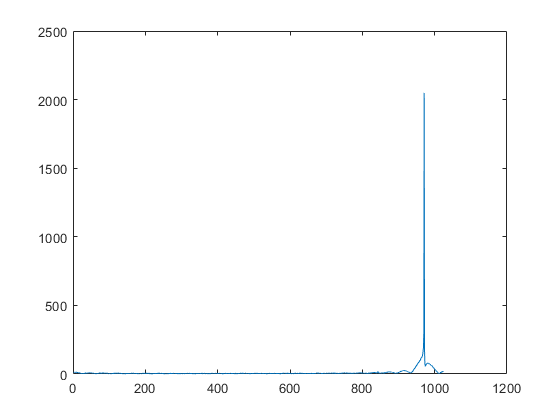

In [136]:
offset = 3216;
Ts = 12;
signal_tmp = obj.preambleSignal((Ts - 1) * obj.loraSet.dine + 1 + offset: Ts * obj.loraSet.dine + offset);
dechirp = signal_tmp .* obj.idealUpchirp;
dechirp_fft = abs(fft(dechirp, obj.loraSet.dine));
dechirp_fft = dechirp_fft(1 : obj.loraSet.fft_x) + dechirp_fft(obj.loraSet.dine - obj.loraSet.fft_x + 1 : obj.loraSet.dine);
plot(dechirp_fft);
[~ , a] = max(dechirp_fft);
a
Sum = sum(dechirp_fft)


ans =

   9.2378e+04




In [ ]:
candidate = zeros(1, obj.loraSet.Preamble_length + 2);

for t = 1 : obj.loraSet.Preamble_length + 4
    signal_tmp = obj.preambleSignal((t - 1) * obj.loraSet.dine + 1 : t * obj.loraSet.dine);
    dechirp = signal_tmp .* obj.idealDownchirp;
    dechirp_fft = abs(fft(dechirp, obj.loraSet.dine));
    dechirp_fft = dechirp_fft(1 : obj.loraSet.fft_x) + dechirp_fft(obj.loraSet.dine - obj.loraSet.fft_x + 1 : obj.loraSet.dine);
    [~, candidate(t)] = max(dechirp_fft);
end

In [64]:
obj.PreambleBin


ans =

   354




In [57]:
obj.preambleEndPos


ans =

     9




In [77]:
disp(obj.decode(signal).binRecord);

  列 1 至 13

         810        1010         386         614         850         406         126        1022         367         677         347         284          27

  列 14 至 23

         551         991         990          49         827         822          85         265         587         421


